In [1]:
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 8)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/all_sources_metadata_2020-03-13.csv')

In [3]:
df.head(3)

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True


In [4]:
df.source_x.value_counts()

PMC        27337
CZI         1236
biorxiv      566
medrxiv      361
dtype: int64

In [5]:
np.argwhere(df.pmcid.value_counts(dropna=False).index == np.nan)

array([], shape=(0, 1), dtype=int64)

In [6]:
type(df.pmcid.iloc[0])

float

In [7]:
df.authors.isna().sum()

946

In [8]:
full_auth_list = df.authors.str.split('; ')
len(full_auth_list)

29500

In [9]:
full_auth_list.dropna(inplace=True)

In [10]:
len(full_auth_list)

28554

In [11]:
full_auth_list = np.concatenate(full_auth_list)
len(full_auth_list)

34141

In [12]:
full_auth_list

array(['Zhang, Haibo', 'Penninger, Josef M.', 'Li, Yimin', ...,
       'Sirtori, C', 'Vischer, T. L.',
       "['Zuckerman, A. J.', 'Taylor, Patricia E.']"], dtype='<U64745')

In [13]:
auth_df = pd.DataFrame({'Author': full_auth_list})
auth_df.head()

,Author
0,"Zhang, Haibo"
1,"Penninger, Josef M."
2,"Li, Yimin"
3,"Zhong, Nanshan"
4,"Slutsky, Arthur S."


In [14]:
auth_df.Author.value_counts()[0:10].values.astype('int')

array([36, 35, 31, 29, 27, 24, 23, 22, 22, 20])

In [15]:
auth_top10 = pd.DataFrame({'Authors': auth_df.Author.value_counts()[0:10].index
                           , 'Articles': auth_df.Author.value_counts()[0:10].values.astype('int')
                          }
                         )
auth_top10

,Authors,Articles
0,"Parry, Jane",36
1,"['Ehrt, Christiane', 'Brinkjost, Tobias', 'Koc...",35
2,"['Bhattacharya, Sabyasachi', 'Katlinski, Kanst...",31
3,"['Bédubourg, Gabriel', 'Le Strat, Yann']",29
4,"['Fossum, Even', 'Friedel, Caroline C.', 'Raja...",27
5,"['Cazelles, Bernard', 'Champagne, Clara', 'Dur...",24
6,"['Xiao, Xiaoping', 'Zhang, Rudian', 'Pang, Xia...",23
7,"['Xiong, Hao', 'Morrison, Juliet', 'Ferris, Ma...",22
8,"['Antunes, Agostinho', 'Troyer, Jennifer L.', ...",22
9,"Nishiura, Hiroshi",20


In [16]:
auth_top10["Authors_Short"] = auth_top10["Authors"].apply(lambda x: x[:40])

In [17]:
auth_top10

,Authors,Articles,Authors_Short
0,"Parry, Jane",36,"Parry, Jane"
1,"['Ehrt, Christiane', 'Brinkjost, Tobias', 'Koc...",35,"['Ehrt, Christiane', 'Brinkjost, Tobias'"
2,"['Bhattacharya, Sabyasachi', 'Katlinski, Kanst...",31,"['Bhattacharya, Sabyasachi', 'Katlinski,"
3,"['Bédubourg, Gabriel', 'Le Strat, Yann']",29,"['Bédubourg, Gabriel', 'Le Strat, Yann']"
4,"['Fossum, Even', 'Friedel, Caroline C.', 'Raja...",27,"['Fossum, Even', 'Friedel, Caroline C.',"
5,"['Cazelles, Bernard', 'Champagne, Clara', 'Dur...",24,"['Cazelles, Bernard', 'Champagne, Clara'"
6,"['Xiao, Xiaoping', 'Zhang, Rudian', 'Pang, Xia...",23,"['Xiao, Xiaoping', 'Zhang, Rudian', 'Pan"
7,"['Xiong, Hao', 'Morrison, Juliet', 'Ferris, Ma...",22,"['Xiong, Hao', 'Morrison, Juliet', 'Ferr"
8,"['Antunes, Agostinho', 'Troyer, Jennifer L.', ...",22,"['Antunes, Agostinho', 'Troyer, Jennifer"
9,"Nishiura, Hiroshi",20,"Nishiura, Hiroshi"


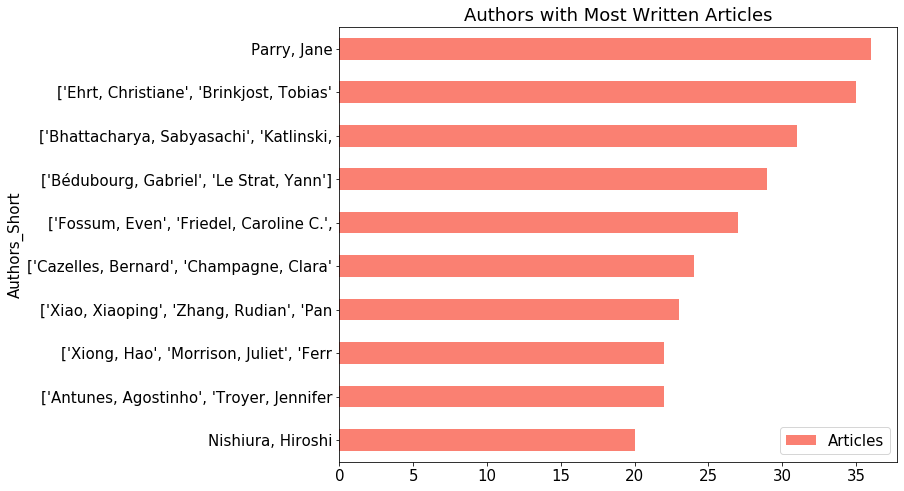

In [18]:
auth_top10.plot.barh(x='Authors_Short'
                     , y='Articles'
                     , color='salmon'
                    )
plt.title('Authors with Most Written Articles')
plt.gca().invert_yaxis();

### Word Analysis of Abstract

In [19]:
df.abstract.iloc[3]

'In December 2019, cases of unidentified pneumonia with a history of exposure in the Huanan Seafood Market were reported in Wuhan, Hubei Province. A novel coronavirus, SARS-CoV-2, was identified to be accountable for this disease. Human-to-human transmission is confirmed, and this disease (named COVID-19 by World Health Organization (WHO)) spread rapidly around the country and the world. As of 18 February 2020, the number of confirmed cases had reached 75,199 with 2009 fatalities. The COVID-19 resulted in a much lower case-fatality rate (about 2.67%) among the confirmed cases, compared with Severe Acute Respiratory Syndrome (SARS) and Middle East Respiratory Syndrome (MERS). Among the symptom composition of the 45 fatality cases collected from the released official reports, the top four are fever, cough, short of breath, and chest tightness/pain. The major comorbidities of the fatality cases include hypertension, diabetes, coronary heart disease, cerebral infarction, and chronic bronch

In [20]:
abstract_df = df.abstract.dropna()
abstract_df.head()

2    The geographic spread of 2019 novel coronaviru...
3    In December 2019, cases of unidentified pneumo...
5    The basic reproduction number of an infectious...
6    The initial cluster of severe pneumonia cases ...
8    Cruise ships carry a large number of people in...
Name: abstract, dtype: object

In [21]:
len(abstract_df)

26553

In [22]:
type(abstract_df)

modin.pandas.series.Series

In [23]:
abstract_df.values[2]

'The basic reproduction number of an infectious agent is the average number of infections one case can generate over the course of the infectious period, in a naïve, uninfected population. It is well-known that the estimation of this number may vary due to several methodological issues, including different assumptions and choice of parameters, utilized models, used datasets and estimation period. With the spreading of the novel coronavirus (2019-nCoV) infection, the reproduction number has been found to vary, reflecting the dynamics of transmission of the coronavirus outbreak as well as the case reporting rate. Due to significant variations in the control strategies, which have been changing over time, and thanks to the introduction of detection technologies that have been rapidly improved, enabling to shorten the time from infection/symptoms onset to diagnosis, leading to faster confirmation of the new coronavirus cases, our previous estimations on the transmission risk of the 2019-nC

In [24]:
text_list = []
for abstract in abstract_df.values:
    text_list.append(abstract)

In [25]:
len(text_list)

26553

In [26]:
from nltk.corpus import stopwords

In [27]:
stop_words = set(stopwords.words('english'))
text_list = ''.join(wd for wd in text_list if wd not in stop_words)

In [28]:
from wordcloud import WordCloud

In [29]:
wordcloud = WordCloud(max_font_size=50
                      , max_words = 150
                      , background_color = 'white'
                      , width = 800
                      , height = 500
                     ).generate(text_list)

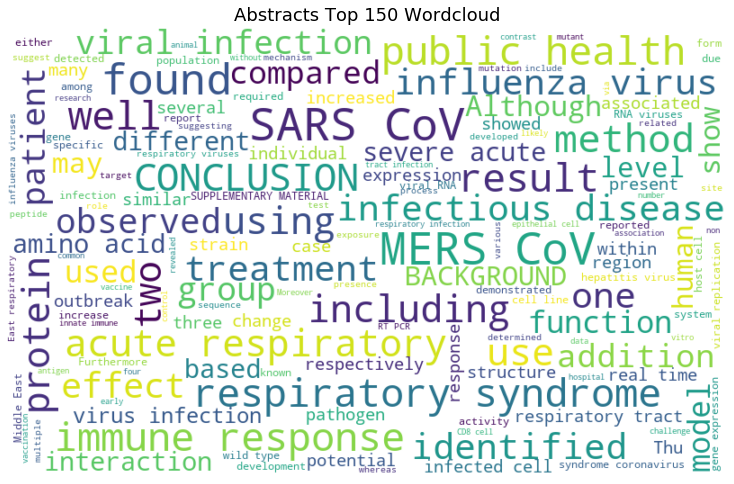

In [30]:
plt.imshow(wordcloud
           , interpolation='bilinear'
          )
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Abstracts Top 150 Wordcloud');